In [6]:
#connect to s3 with the sdk
from boto.s3.connection import S3Connection
from PIL import Image 
import webbrowser
import datetime
import boto3
import json
from boto.s3.key import Key

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
client = boto3.client('rekognition','us-east-1')
%matplotlib inline

#You must change these to your own password and bucket information.
conn = S3Connection()

from matplotlib.pyplot import imshow
import json
from pprint import pprint

%matplotlib inline
import matplotlib
matplotlib.rc("savefig", dpi=100)
import cv2
from collections import namedtuple

print ('done')

done


In [7]:
#print the bucket name and contents
mybuckets = conn.get_all_buckets()
print(len(mybuckets))

print ('print info about this bucket')
#this bucket is read-public, so feel free to follow this example code without changing 
#anything besides public/private key
bucketname='celebrekognition'
s3bucket = conn.get_bucket(bucketname)
print(s3bucket)
size = 0
count = 0
for key in s3bucket.list():
    size += key.size
    count += 1
 
print ("%.3f GB" % (size*1.0/1024/1024/1024))
print ("num files: "+str(count))

for key in s3bucket.list():
        print ("{name}\t{size}\t{modified}".format(
                name = key.name,
                size = key.size,
                modified = key.last_modified,
                ))

2
print info about this bucket
<Bucket: celebrekognition>
0.000 GB
num files: 8
A._Schwarzenegger.jpg	10570	2017-09-17T09:42:58.000Z
Angelina.jpg	156956	2017-09-17T09:43:01.000Z
Justin.jpg	28603	2017-09-17T09:43:05.000Z
Leonardo.jpg	5731	2017-09-17T09:43:07.000Z
MeganFox.jpg	64753	2017-09-17T09:43:08.000Z
brad-pitt.jpg	146241	2017-09-17T09:43:03.000Z
halle-berry.jpg	20142	2017-09-17T09:43:04.000Z
titanic-movie.jpg	24519	2017-09-17T11:48:08.000Z


In [8]:
#a demo of looping over a s3 bucket. printing out the MTCNN and the num_faces 
#from rekognition's api. Looking at printed output gives interesting results about errors
#coming from both sides. Errors are few though, and are usually worth taking in exchange
#for the cost savings
import commands
count=0
failcount=0

correctAPICall=0
incorrectAPICall=0

        
for key in s3bucket.list():
    #use this line to control how many loops
    if count==50:
        break
    count += 1
    if ((count % 100) == 0):
        print ('at count: '+str(count)+'\n')
        
    print(key.name)
    try:
        
        response = client.recognize_celebrities(
            Image={
                'S3Object': {
                'Bucket': bucketname,
                'Name': key.name,
                #'Version': '1'
            }
        }
        )

        #version 1: get ground truth from rekognition api
        num_celeb_faces=len(response['CelebrityFaces']) 
        print('Rekognition celeb faces detected count: '+str(num_celeb_faces))
        for faces in response['CelebrityFaces']:
            print("MatchConfidence:" +str(faces['MatchConfidence']))
            print("Name:" + faces['Name'])

   
        #keep track of success/fail ratio   
        if (num_celeb_faces>0):
            correctAPICall+=1
            print('correct api call')
        else:
            incorrectAPICall+=1
            print('incorrect api call')
        print('')
    except:
        print ('failed on: '+key.name)
        print('')
        failcount=(failcount+1)
        print(response)
       

print('correctAPICall '+str(correctAPICall))
print('incorrectAPICall '+str(incorrectAPICall))
print('fail count '+str(failcount))
print('total number of photos processed '+str(correctAPICall+incorrectAPICall+failcount))

A._Schwarzenegger.jpg
Rekognition celeb faces detected count: 1
MatchConfidence:100.0
Name:Arnold Schwarzenegger
correct api call

Angelina.jpg
Rekognition celeb faces detected count: 1
MatchConfidence:92.0
Name:Angelina Jolie
correct api call

Justin.jpg
Rekognition celeb faces detected count: 1
MatchConfidence:99.0
Name:Justin Bieber
correct api call

Leonardo.jpg
Rekognition celeb faces detected count: 1
MatchConfidence:100.0
Name:Leonardo DiCaprio
correct api call

MeganFox.jpg
Rekognition celeb faces detected count: 1
MatchConfidence:99.0
Name:Megan Fox
correct api call

brad-pitt.jpg
Rekognition celeb faces detected count: 1
MatchConfidence:100.0
Name:Brad Pitt
correct api call

halle-berry.jpg
Rekognition celeb faces detected count: 1
MatchConfidence:100.0
Name:Halle Berry
correct api call

titanic-movie.jpg
Rekognition celeb faces detected count: 2
MatchConfidence:100.0
Name:Leonardo DiCaprio
MatchConfidence:100.0
Name:Kate Winslet
correct api call

correctAPICall 8
incorrectAP

titanic-movie.jpg


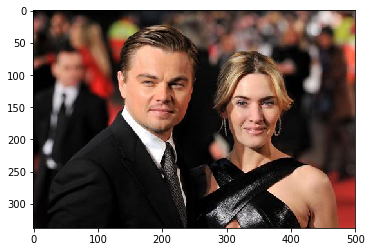

In [9]:
#retrieve and print a selected image
image='titanic-movie.jpg'.replace('+',' ')
print (image)
#make sure that you have the folder path in whatever instance is running this code
folder='/home/ubuntu/images'
temp_image=folder+'temp_image.jpg'

key = s3bucket.get_key(image)
#use the same file name for each temp image or you will start getting a ton of photos 
#stored in the folder
#also, if you are using your own bucket, you may need to tweak this code to handle '/'s
key.get_contents_to_filename(temp_image)                                                                  
pil_im = Image.open(temp_image, 'r')
imshow(np.asarray(pil_im))